In [2]:
# =========================================
# 📊 Tokopedia Product Review Case Study
# Data Analyst Portfolio Project
# =========================================

In [3]:
# --- Import Library --- #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [4]:
# --- Load Dataset --- #
df = pd.read_csv("tokopedia-product-reviews-2019.csv")

In [5]:
# --- Data looks --- #
print(df.head())
print(df.info())

   Unnamed: 0                                             text  rating  \
0           1           Barang sesuai pesanan dan cepat sampai       5   
1           2                         Barang bagus harga murah       5   
2           3  Paket rapi...mantap....cepat....sampe ke tujuan       5   
3           4                       ya saya puas dgn barangnya       5   
4           5                     Responya luar biasa b mantap       5   

      category                                       product_name  product_id  \
0  pertukangan  Staples Dekorasi Staples Kayu + Refill 8mm - S...   418660637   
1  pertukangan  STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   416032545   
2  pertukangan  STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   416032545   
3  pertukangan  ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...   102279869   
4  pertukangan  Isi Refill Staples Jok Kulit Motor / Staple Gu...   190679689   

  sold  shop_id                                        product_url  

In [8]:
# --- Data Cleaning --- #
# Erase Dupculicate Data #
df.drop_duplicates()

# Menangani nilai yang hilang (hapus atau isi tergantung pada kolom)
df = df.dropna(subset=["product_id", "product_name", "category", "sold", "rating"])

# Convert Datatype #
if "sold" in df.columns:
    df["sold"] = pd.to_numeric(df["sold"], errors="coerce").fillna(0).astype(int)

if "rating" in df.columns:
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

In [ ]:
### 🎯 Introduction
Proyek ini menganalisis review produk Tokopedia dengan tujuan:
1. Mengidentifikasi produk & kategori terlaris.  
2. Menganalisis hubungan rating & penjualan.  
3. Mengevaluasi sentimen review konsumen. 

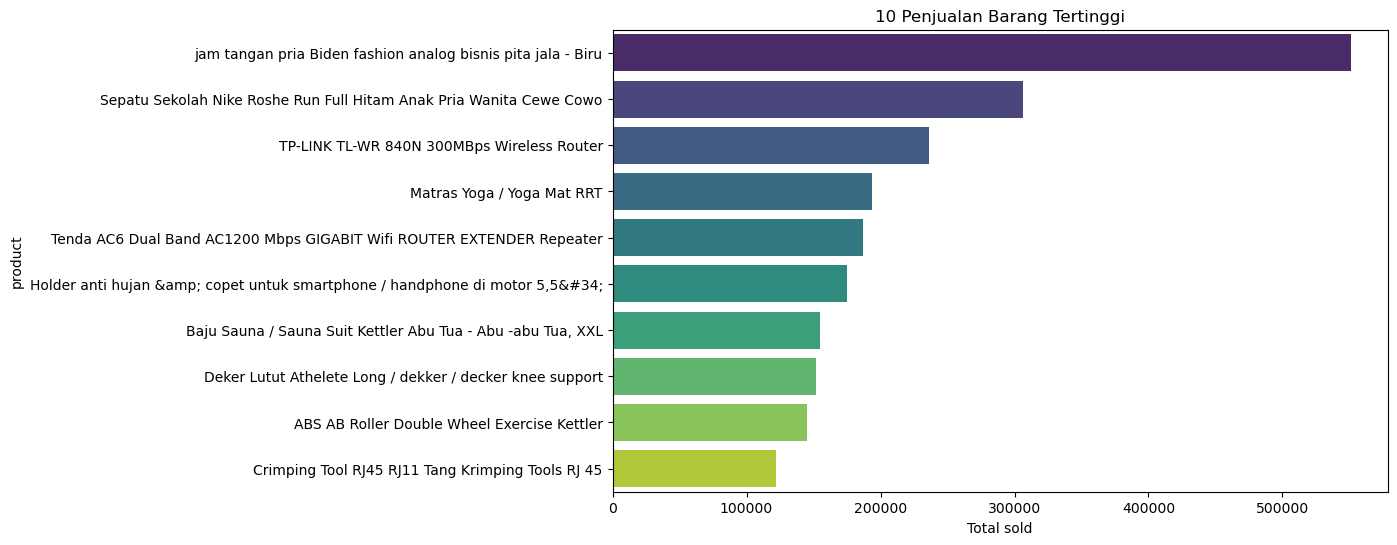

In [9]:
# --- EDA Produk Terlaris --- #
plt.figure(figsize=(10,6))
top_sold = df.groupby("product_name")["sold"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_sold.values, y=top_sold.index, palette="viridis")
plt.title("10 Penjualan Barang Tertinggi")
plt.xlabel("Total sold")
plt.ylabel("product")
plt.show()

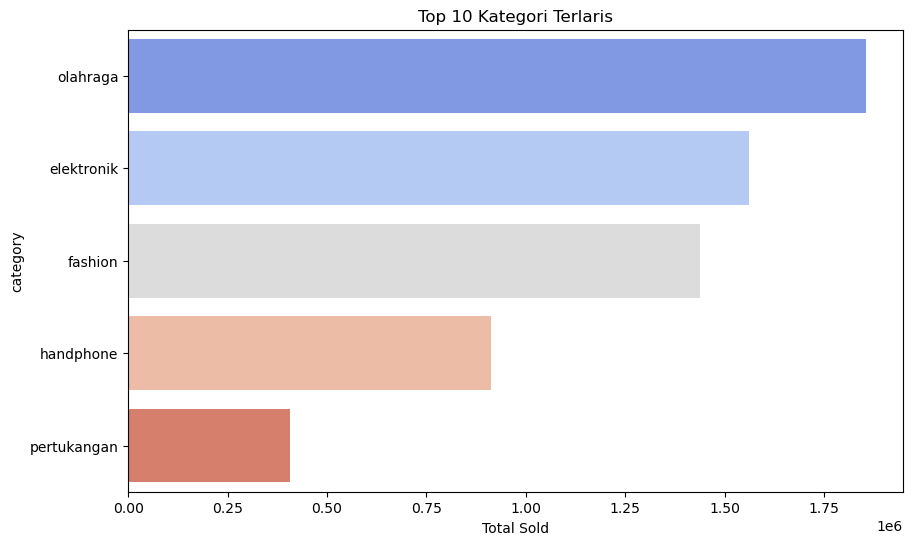

In [6]:
# --- EDA Kategori Produk --- #
plt.figure(figsize=(10,6))
df['sold'] = pd.to_numeric(df['sold'], errors='coerce').fillna(0).astype(int)
top_cat = df.groupby("category")["sold"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_cat.values, y=top_cat.index, palette="coolwarm")
plt.title("Top 10 Kategori Terlaris")
plt.xlabel("Total Sold")
plt.ylabel("category")
plt.show()

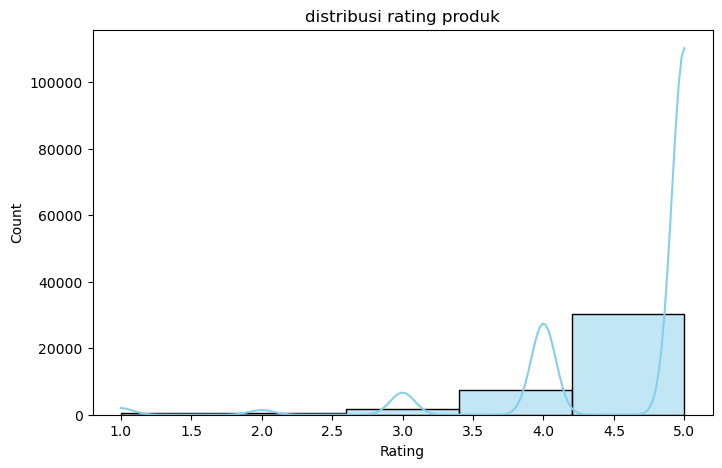

In [10]:
# --- Distribusi Rating --- #
plt.figure(figsize=(8,5))
sns.histplot(df["rating"], bins=5, kde=True, color="skyblue")
plt.title("distribusi rating produk")
plt.xlabel("Rating")
plt.show()

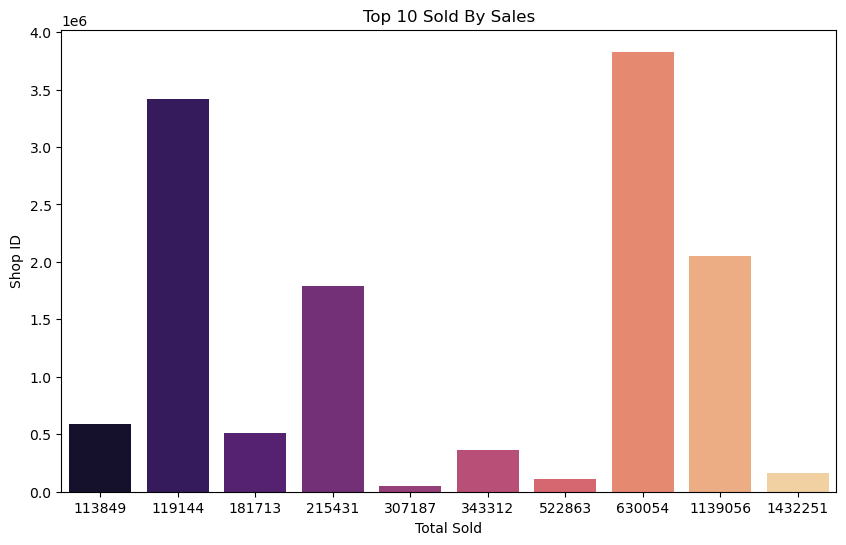

In [7]:
# --- Shop Performance --- #
plt.figure(figsize=(10,6))
top_shops = df.groupby("shop_id")["sold"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_shops.values, y=top_shops.index, palette="magma")
plt.title("Top 10 Sold By Sales")
plt.xlabel("Total Sold")
plt.ylabel("Shop ID")
plt.show()

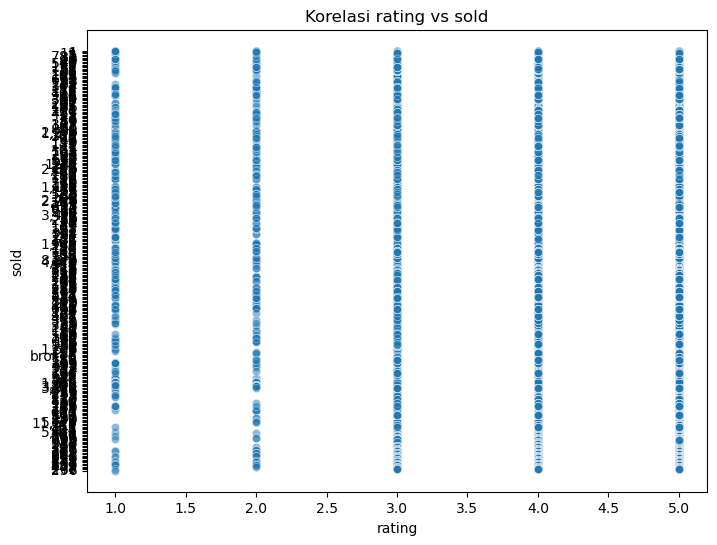

In [8]:
# --- Korelasi Rating & penjualan ---#
plt.figure(figsize=(8,6))
sns.scatterplot(x="rating", y="sold", data=df, alpha=0.5)
plt.title("Korelasi rating vs sold")
plt.xlabel("rating")
plt.ylabel("sold")
plt.show()

In [9]:
# --- Produk Underrated (Rating tinggi, Penjualan rendah --- #
underrated = df[(df["rating"] >= 4.5) & (df["sold"] < df["sold"].median())]
print("Produk dengan rating tinggi tapi penjualan rendah:")
print(underrated[["product_name","category","sold","rating"]].head(10))

Produk dengan rating tinggi tapi penjualan rendah:
                                         product_name     category  sold  \
0   Staples Dekorasi Staples Kayu + Refill 8mm - S...  pertukangan     1   
1   STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...  pertukangan    11   
2   STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...  pertukangan    11   
3   ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...  pertukangan     5   
33                         Electric Rivet Gun Adapter  pertukangan     9   
35                         Electric Rivet Gun Adapter  pertukangan     9   
36  Staple Gun 3 in 1 Mollar Staples Tembak Staple...  pertukangan    40   
37  Staple Gun 3 in 1 Mollar Staples Tembak Staple...  pertukangan    40   
38  Staple Gun 3 in 1 Mollar Staples Tembak Staple...  pertukangan    40   
39  Staple Gun 3 in 1 Mollar Staples Tembak Staple...  pertukangan    40   

    rating  
0        5  
1        5  
2        5  
3        5  
33       5  
35       5  
36       5  
37      

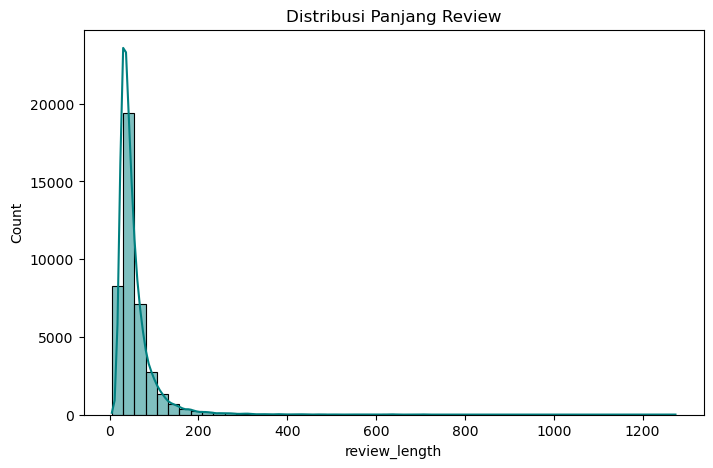

In [10]:
# --- Analisis Review Text ---
df["review_length"] = df["text"].astype(str).apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df["review_length"], bins=50, kde=True, color="teal")
plt.title("Distribusi Panjang Review")
plt.show()

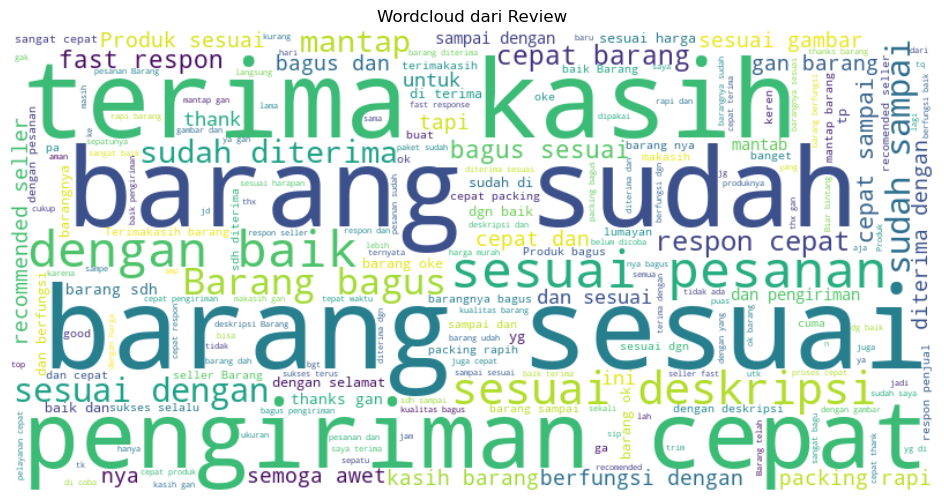

In [11]:
# --- Wordcloud ---
text_all = " ".join(df["text"].dropna().astype(str).values)
stopwords = set(STOPWORDS)
wc = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(text_all)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud dari Review")
plt.show()

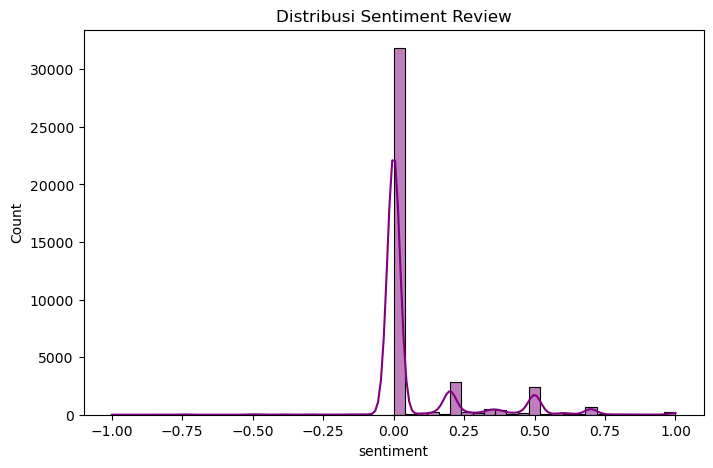

In [12]:
# --- Sentiment Analysis ---
df["sentiment"] = df["text"].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8,5))
sns.histplot(df["sentiment"], bins=50, kde=True, color="purple")
plt.title("Distribusi Sentiment Review")
plt.show()

In [14]:
### 💡 Business Insights
1. Produk **elektronik & fashion** mendominasi penjualan → fokus promosi di kategori ini.  
2. **Rating tinggi** biasanya mendukung penjualan, tapi ada produk rating bagus dengan sold rendah → peluang marketing.  
3. Sebagian besar review bernuansa **positif** → tingkat kepuasan konsumen tinggi.  
4. Ada beberapa kategori **niche** dengan potensi pertumbuhan besar → bisa jadi target promosi spesifik.  

SyntaxError: invalid character '→' (U+2192) (3325792692.py, line 2)

In [ ]:
### ✅ Conclusion
Analisis ini menunjukkan bahwa:
- Fokus ke **kategori elektronik & fashion** akan memberi dampak signifikan pada revenue.  
- Optimalkan produk dengan **rating tinggi tapi sold rendah** lewat promosi/iklan.  
- Gunakan review positif untuk kampanye branding & tingkatkan perhatian pada review negatif agar loyalitas konsumen terjaga.  